In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.9/756.9 kB 20.7 MB/s eta 0:00:0000:01


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import torch
from tqdm.notebook import tqdm
import time

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [3]:
sample = '/kaggle/input/deepfake-detection-challenge/train_sample_videos/aagfhgtpmv.mp4'

reader = cv2.VideoCapture(sample)
images_1080_1920 = []
images_720_1280 = []
images_540_960 = []
for i in tqdm(range(int(reader.get(cv2.CAP_PROP_FRAME_COUNT)))):
    _, image = reader.read()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images_1080_1920.append(image)
    images_720_1280.append(cv2.resize(image, (1280, 720)))
    images_540_960.append(cv2.resize(image, (960, 540)))
reader.release()

images_1080_1920 = np.stack(images_1080_1920)
images_720_1280 = np.stack(images_720_1280)
images_540_960 = np.stack(images_540_960)

print('Shapes:')
print(images_1080_1920.shape)
print(images_720_1280.shape)
print(images_540_960.shape)

  0%|          | 0/300 [00:00<?, ?it/s]

Shapes:
(300, 1080, 1920, 3)
(300, 720, 1280, 3)
(300, 540, 960, 3)


In [4]:
sample = '/kaggle/input/deepfake-detection-challenge/train_sample_videos/aagfhgtpmv.mp4'

reader = cv2.VideoCapture(sample)
images_1080_1920 = []
images_720_1280 = []
images_540_960 = []
for i in tqdm(range(int(reader.get(cv2.CAP_PROP_FRAME_COUNT)))):
    _, image = reader.read()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images_1080_1920.append(image)
    images_720_1280.append(cv2.resize(image, (1280, 720)))
    images_540_960.append(cv2.resize(image, (960, 540)))
reader.release()

images_1080_1920 = np.stack(images_1080_1920)
images_720_1280 = np.stack(images_720_1280)
images_540_960 = np.stack(images_540_960)

print('Shapes:')
print(images_1080_1920.shape)
print(images_720_1280.shape)
print(images_540_960.shape)

  0%|          | 0/300 [00:00<?, ?it/s]

Shapes:
(300, 1080, 1920, 3)
(300, 720, 1280, 3)
(300, 540, 960, 3)


In [6]:
def plot_faces(images, figsize=(10.8/2, 19.2/2)):
    shape = images[0].shape
    images = images[np.linspace(0, len(images)-1, 16).astype(int)]
    im_plot = []
    for i in range(0, 16, 4):
        im_plot.append(np.concatenate(images[i:i+4], axis=0))
    im_plot = np.concatenate(im_plot, axis=1)
    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.imshow(im_plot)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    ax.grid(False)
    fig.tight_layout()

def timer(detector, detect_fn, images, *args):
    start = time.time()
    faces = detect_fn(detector, images, *args)
    elapsed = time.time() - start
    print(f', {elapsed:.3f} seconds')
    return faces, elapsed

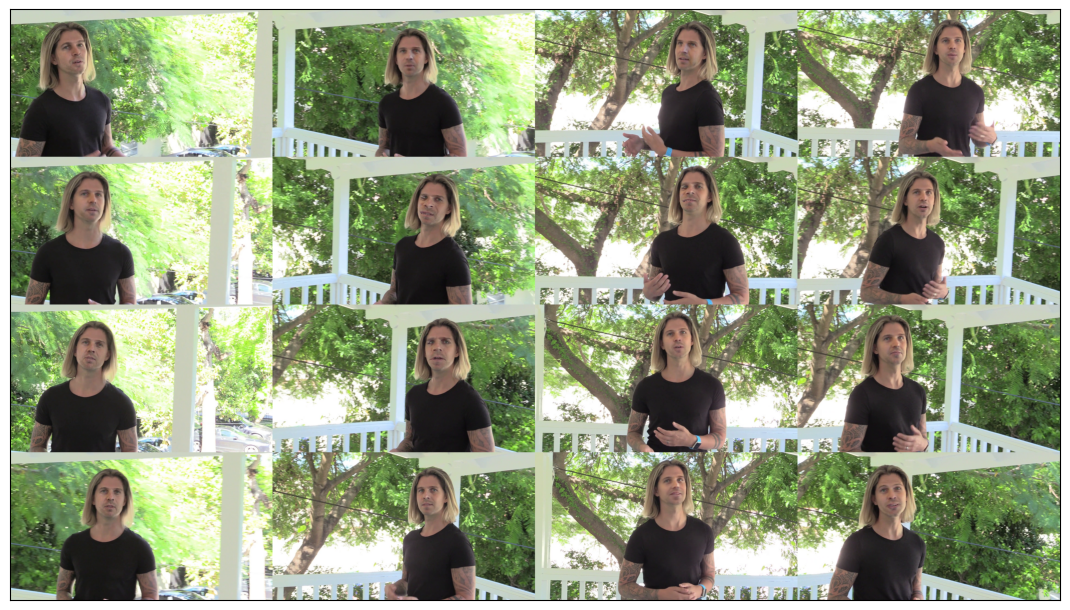

In [7]:
plot_faces(images_540_960, figsize=(10.8, 19.2))

In [8]:
from ultralytics import YOLO

detector = YOLO('/kaggle/input/yolov8-face-weights/yolov8n-face.pt')

WARNING ⚠️ /kaggle/input/yolov8-face-weights/yolov8n-face.pt appears to require 'omegaconf', which is not in ultralytics requirements.
AutoInstall will run now for 'omegaconf' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['omegaconf'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 232.0 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=97cd11f5554a6e907f963fbd3c32771372764580a9592076026e54596149eba8
  Stored in directory: /tmp/pip-ephem-wheel-cache-2k4xbrk6/wheels/12/93/dd

In [ ]:
detector = YOLO('/kaggle/input/yolov8-face-weights/yolov8n-face.pt')

In [26]:
def detect_yolo(detector, images):
    faces = []
    for image in images:
        faces.append(detector(image, verbose=False, device=device)[0].boxes.xyxy)
    
    return faces

In [27]:
times_yolo = []

In [28]:
print('Detecting faces in 540x960 frames', end='')
_, elapsed = timer(detector, detect_yolo, images_540_960)
times_yolo.append(elapsed)

print('Detecting faces in 720x1280 frames', end='')
_, elapsed = timer(detector, detect_yolo, images_720_1280)
times_yolo.append(elapsed)

print('Detecting faces in 1080x1920 frames', end='')
faces, elapsed = timer(detector, detect_yolo, images_1080_1920)
times_yolo.append(elapsed)

# plot_faces(np.stack([cv2.resize(f, (160, 160)) for f in faces]))

Detecting faces in 540x960 frames, 2.784 seconds
Detecting faces in 720x1280 frames, 2.752 seconds
Detecting faces in 1080x1920 frames, 2.981 seconds
